In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

In [3]:
def least_squares(data1, data2):
    x_mean = np.mean(data1)
    y_mean = np.mean(data2)
    b1 = np.sum((data1 - x_mean) * data2) / np.sum((data1 - x_mean) ** 2)
    b0 = y_mean - b1 * x_mean
    return b0, b1

# Zad1

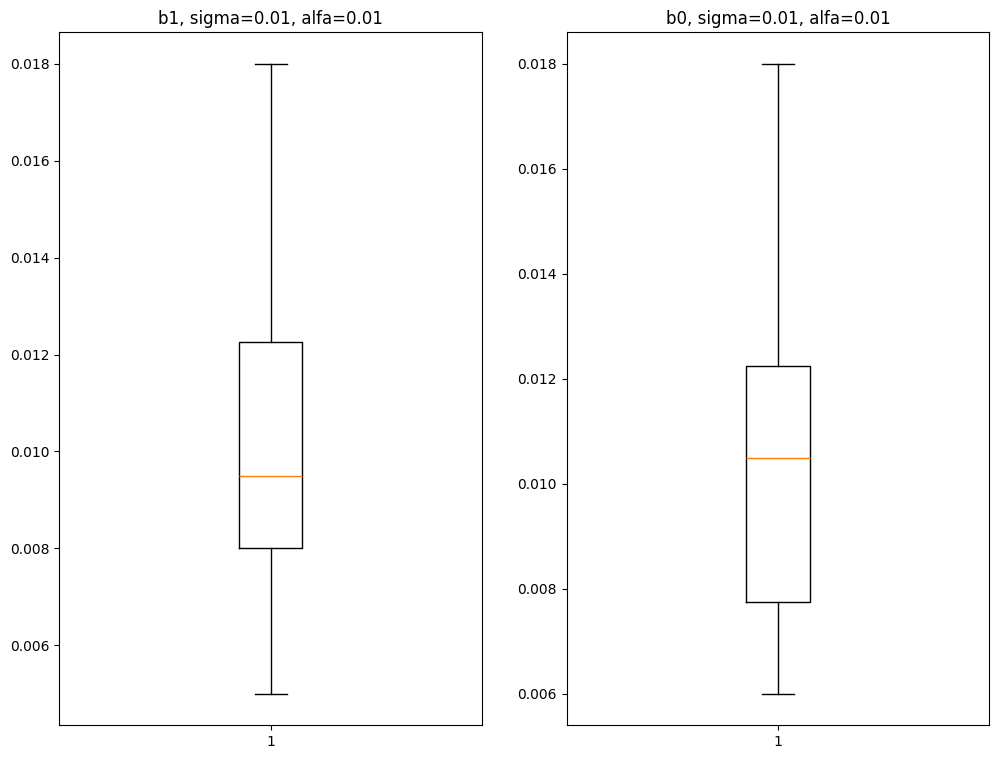

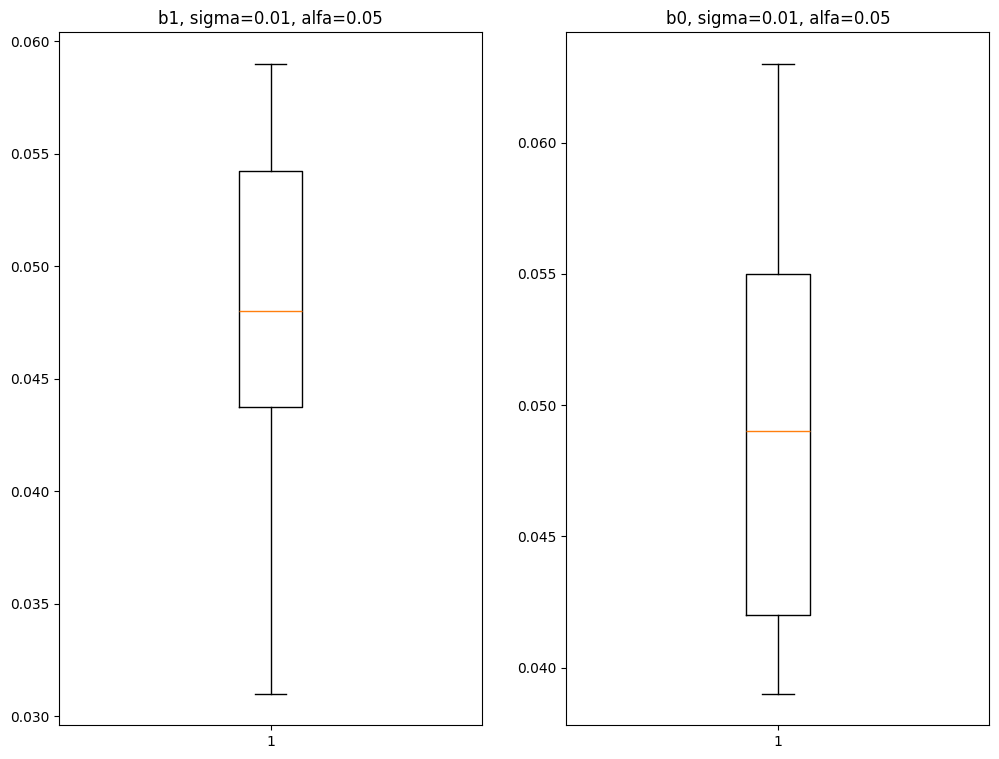

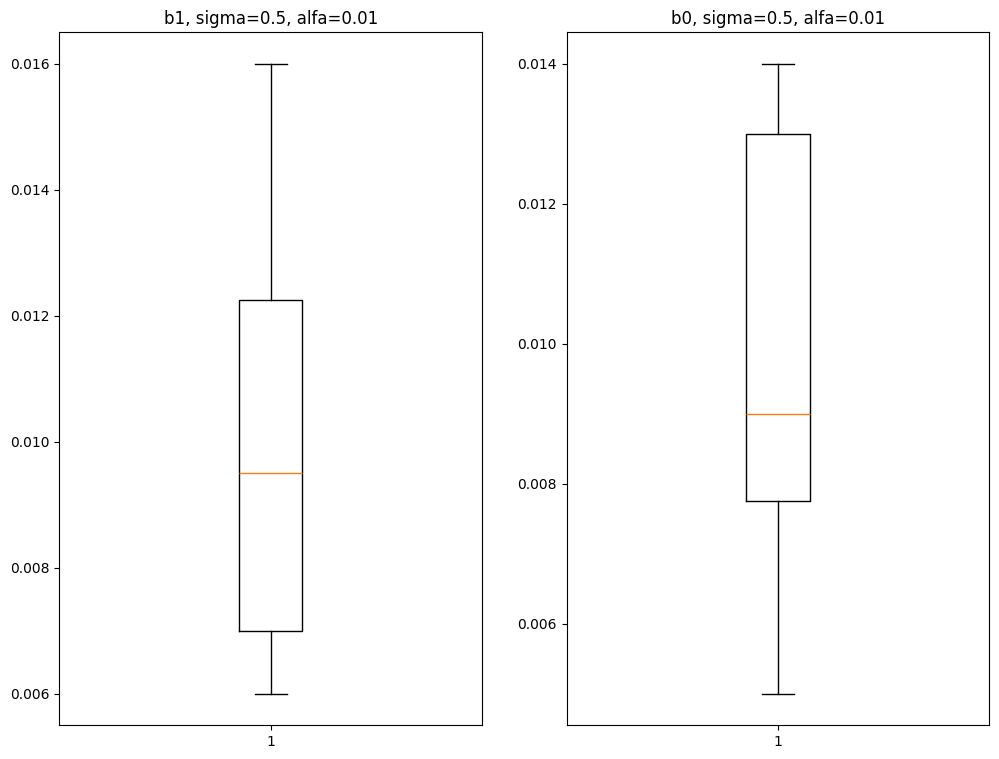

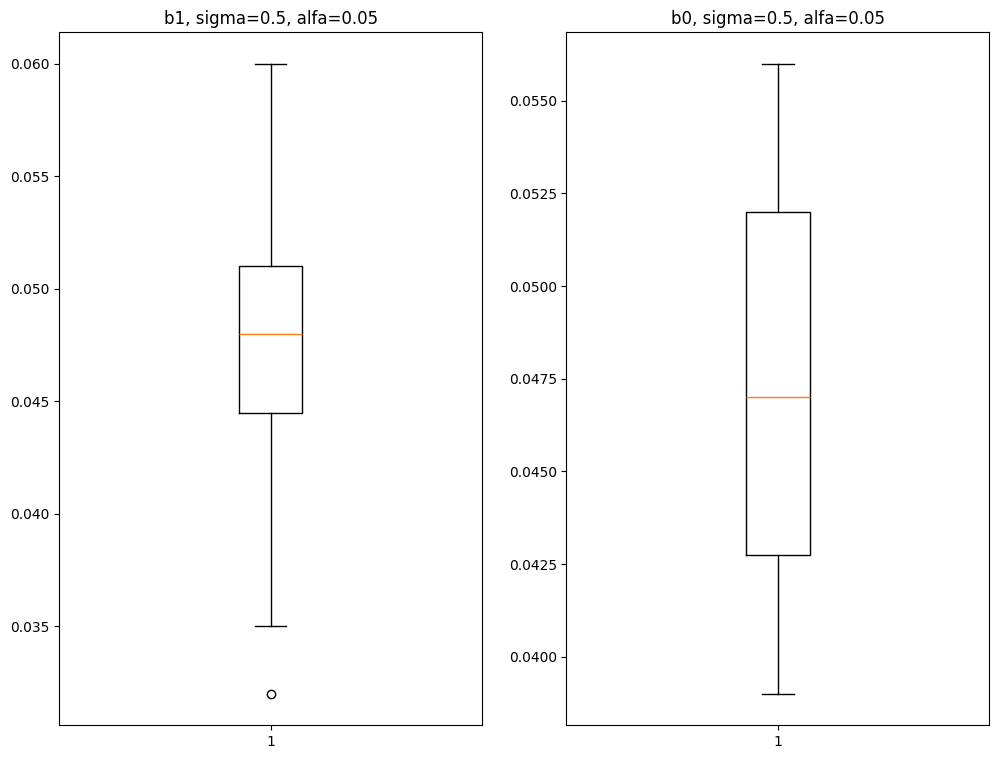

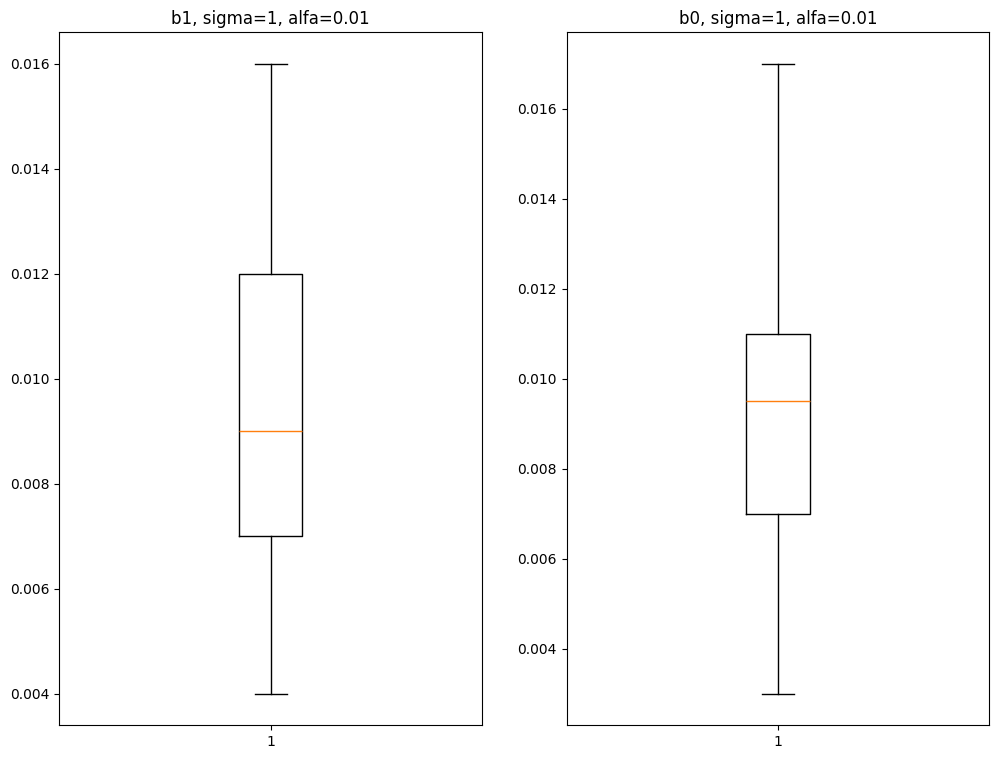

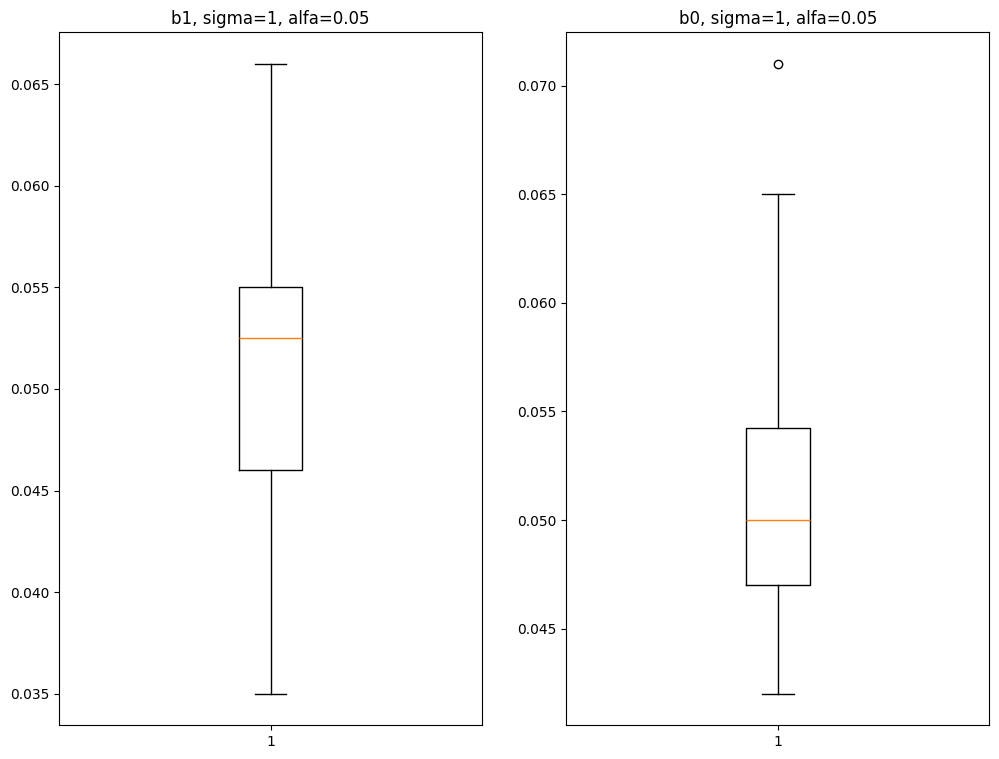

In [4]:
alfa_list = [0.01, 0.05]
sigma_list = [0.01, 0.5, 1]
n_list = np.arange(100, 2001, 100)
N = 1000

b0 = 2
b1 = 4

for sigma in sigma_list:
    for alfa in alfa_list:
        b0_conv_list = []
        b1_conv_list = []
        for n in n_list:
            b0_count = 0
            b1_count = 0
            for i in range(N):
                x = np.arange(1, n+1)
                e_i = np.random.normal(0, sigma, n)
                y_i = b0 + b1*x + e_i
                
                b0_hat, b1_hat = least_squares(x, y_i)
                
                var_b0 = sigma**2 * (1/n + x.mean()**2 / np.sum((x - x.mean())**2))
                var_b1 = sigma**2 / np.sum((x - x.mean())**2)
                z = norm.ppf(1 - alfa/2)
                
                b1_bottom_bound = b1_hat - z * np.sqrt(var_b1)
                b1_top_bound = b1_hat + z * np.sqrt(var_b1)
                
                b0_bottom_bound = b0_hat - z * np.sqrt(var_b0)
                b0_top_bound = b0_hat + z * np.sqrt(var_b0)
                
                if b1_bottom_bound <= b1 <= b1_top_bound:
                    b1_count += 1
                if b0_bottom_bound <= b0 <= b0_top_bound:
                    b0_count += 1
            w0 = 1 - b0_count/N
            w1 = 1 - b1_count/N
            b0_conv_list.append(w0)
            b1_conv_list.append(w1)
        
        plt.figure(figsize=(12, 9))
        
        plt.subplot(1, 2, 1)
        plt.boxplot(b1_conv_list)
        plt.title(f'b1, sigma={sigma}, alfa={alfa}')
        
        plt.subplot(1, 2, 2)
        plt.boxplot(b0_conv_list)
        plt.title(f'b0, sigma={sigma}, alfa={alfa}')
        
        plt.show()
        

# Zad2

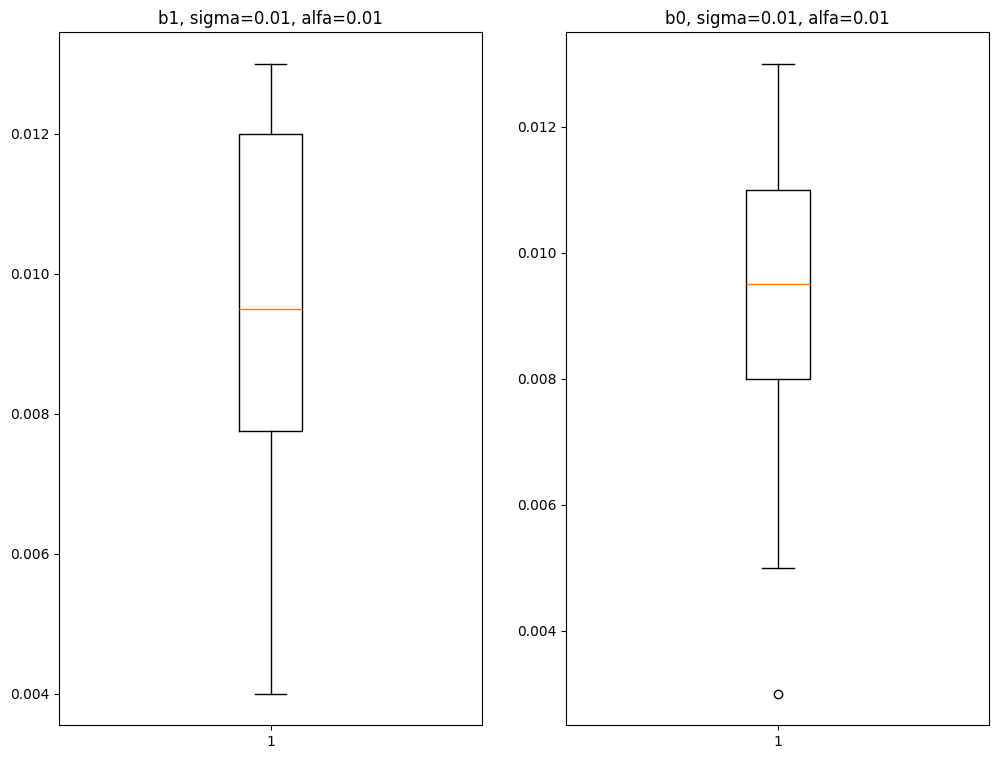

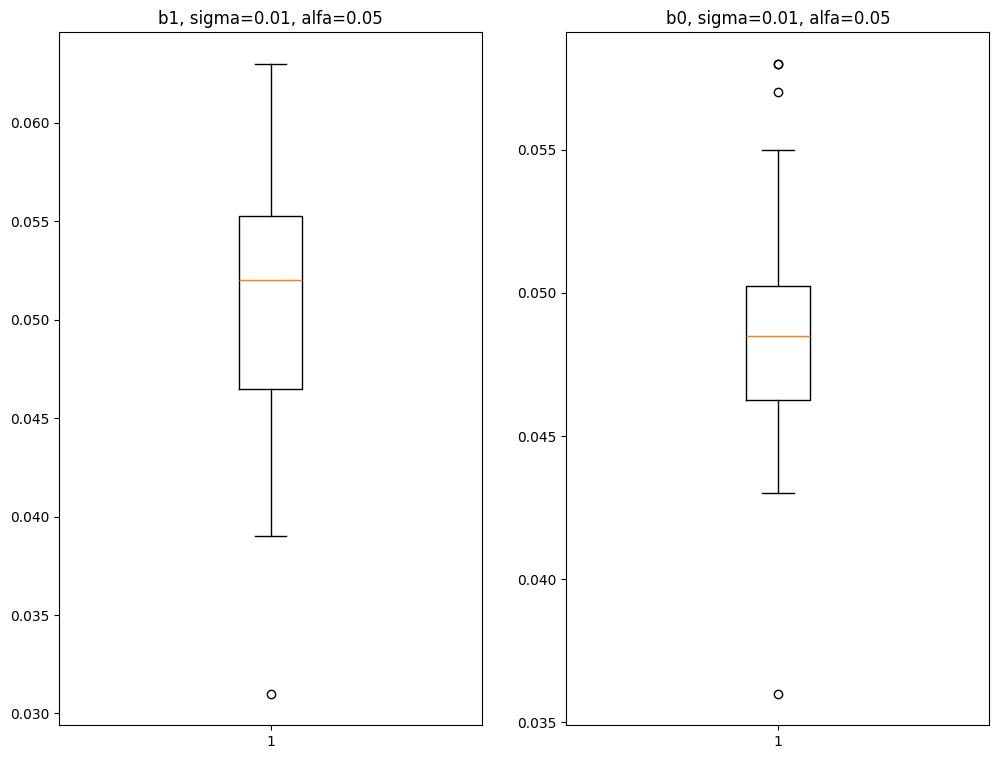

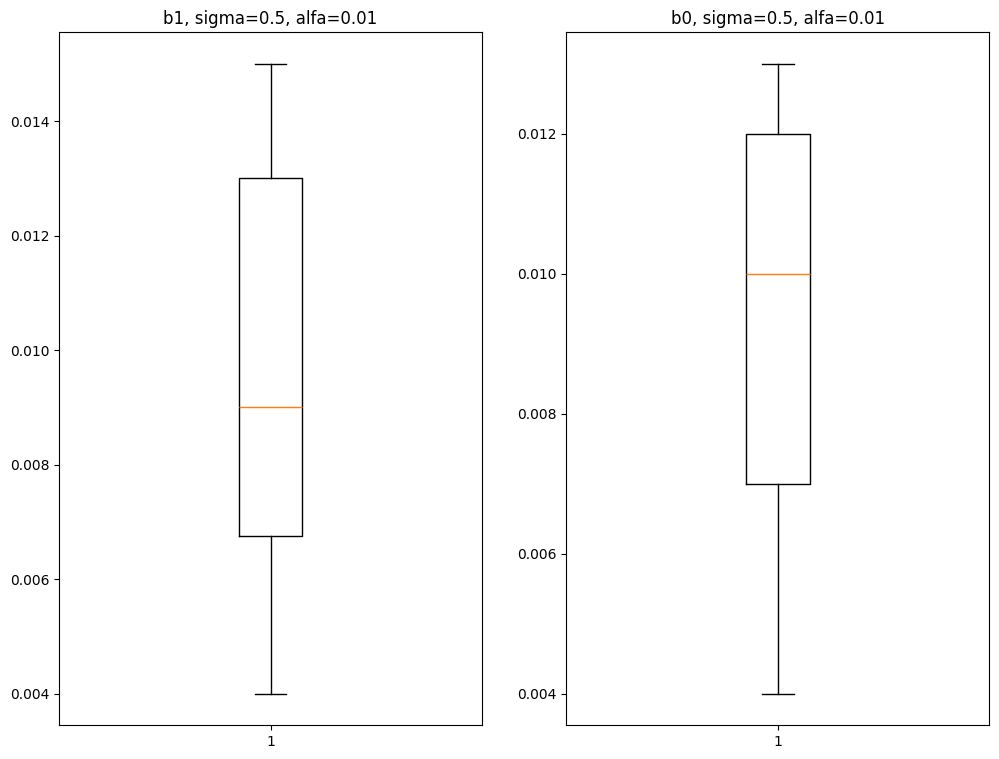

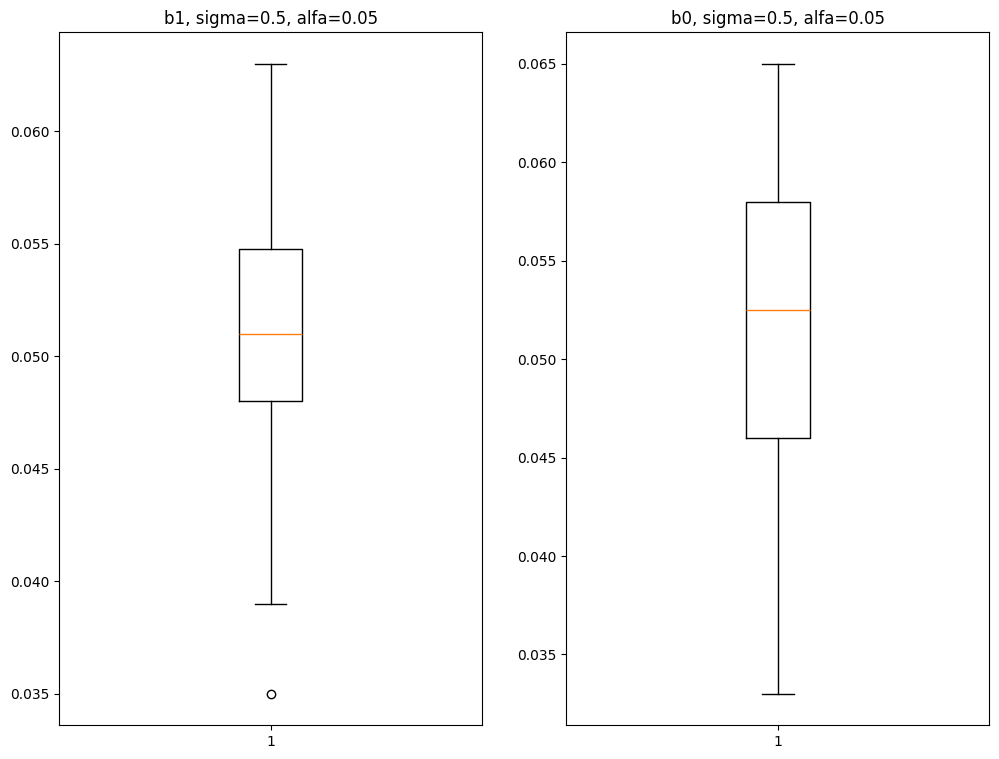

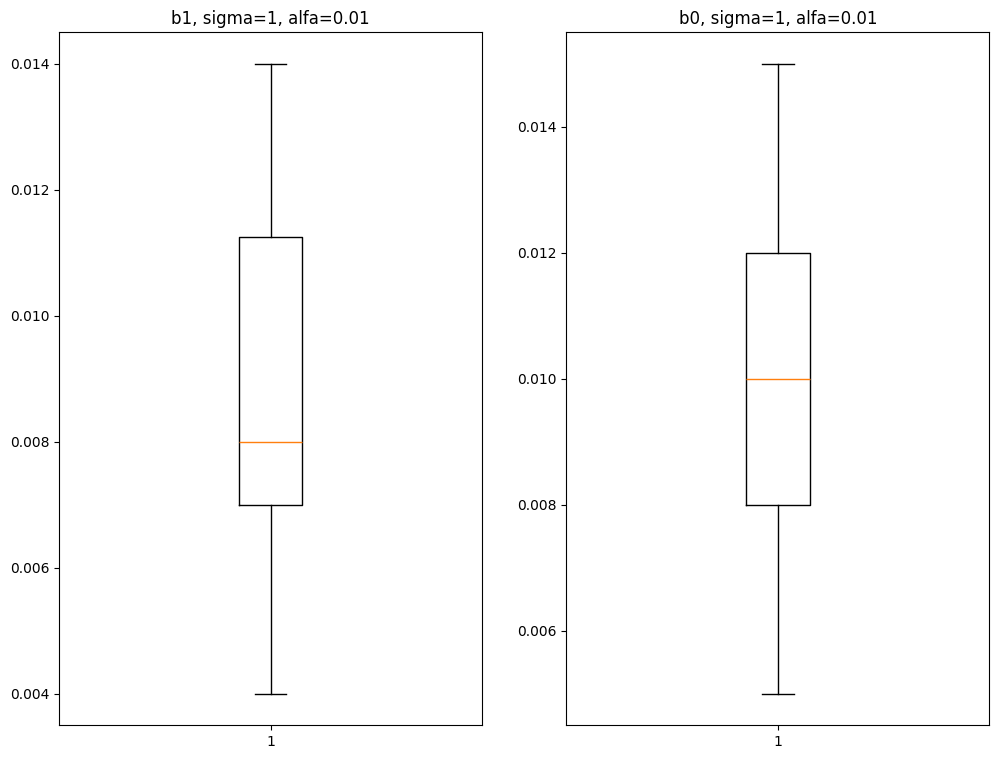

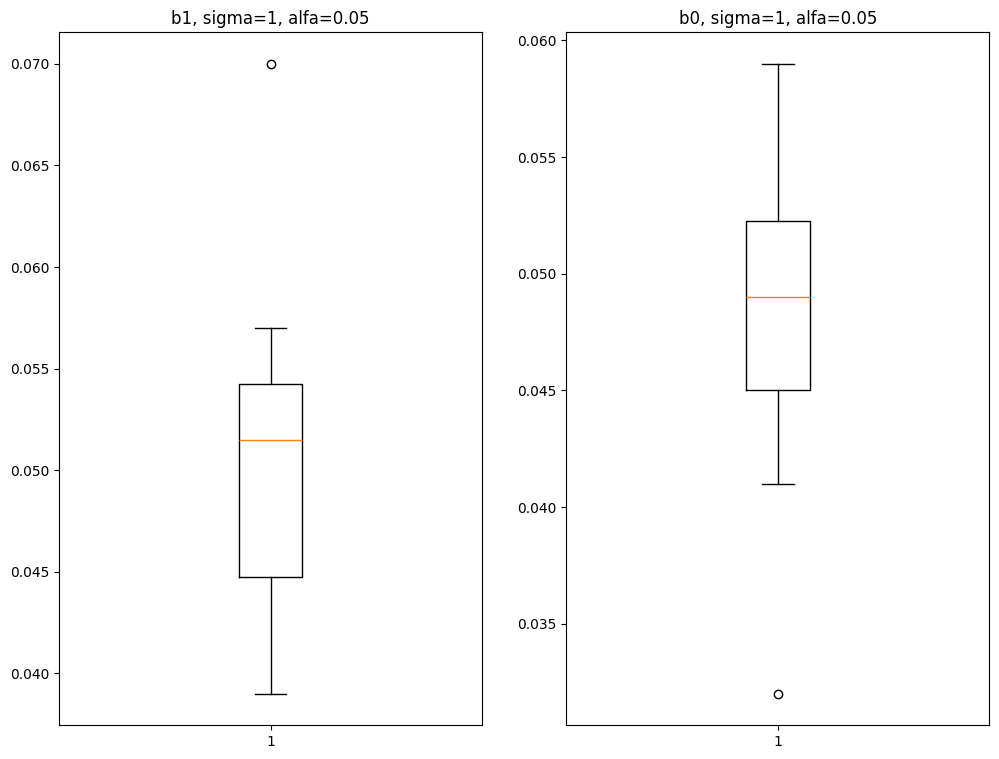

In [5]:
alfa_list = [0.01, 0.05]
sigma_list = [0.01, 0.5, 1]
n_list = np.arange(100, 2001, 100)
N = 1000

b0 = 2
b1 = 4

for sigma in sigma_list:
    for alfa in alfa_list:
        b0_conv_list = []
        b1_conv_list = []
        for n in n_list:
            b0_count = 0
            b1_count = 0
            for i in range(N):
                x = np.arange(1, n+1)
                e_i = np.random.normal(0, sigma, n)
                y_i = b0 + b1*x + e_i
                
                b0_hat, b1_hat = least_squares(x, y_i)
                y_i_hat = b0_hat + b1_hat * x
                s = np.sqrt(np.sum((y_i - y_i_hat)**2) / (n-2))
                
                t_student = t.ppf(1 - alfa/2, n-2)
                
                b1_bottom_bound = b1_hat - t_student * s / np.sqrt(np.sum((x - x.mean())**2))
                b1_top_bound = b1_hat + t_student * s / np.sqrt(np.sum((x - x.mean())**2))
                
                b0_bottom_bound = b0_hat - t_student * s * np.sqrt(1/n + x.mean()**2 / np.sum((x - x.mean())**2))
                b0_top_bound = b0_hat + t_student * s * np.sqrt(1/n + x.mean()**2 / np.sum((x - x.mean())**2))
                
                if b1_bottom_bound <= b1 <= b1_top_bound:
                    b1_count += 1
                if b0_bottom_bound <= b0 <= b0_top_bound:
                    b0_count += 1
            w0 = 1 - b0_count/N
            w1 = 1 - b1_count/N
            b0_conv_list.append(w0)
            b1_conv_list.append(w1)
        
        plt.figure(figsize=(12, 9))
        
        plt.subplot(1, 2, 1)
        plt.boxplot(b1_conv_list)
        plt.title(f'b1, sigma={sigma}, alfa={alfa}')
        
        plt.subplot(1, 2, 2)
        plt.boxplot(b0_conv_list)
        plt.title(f'b0, sigma={sigma}, alfa={alfa}')
        
        plt.show()
        

# Zad3

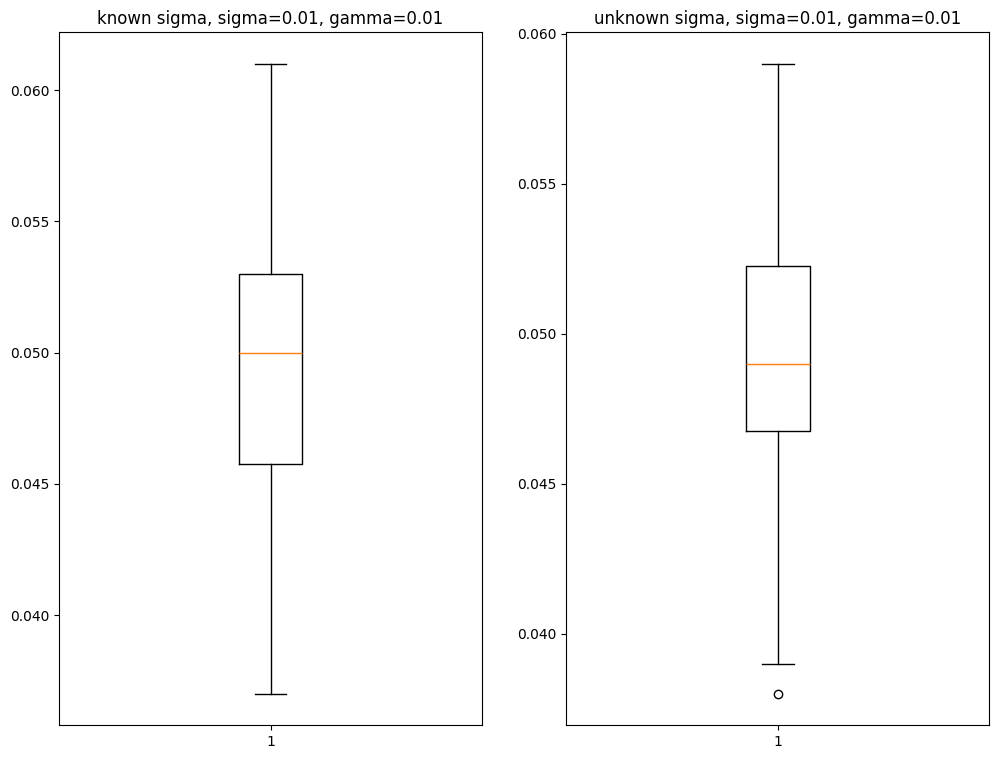

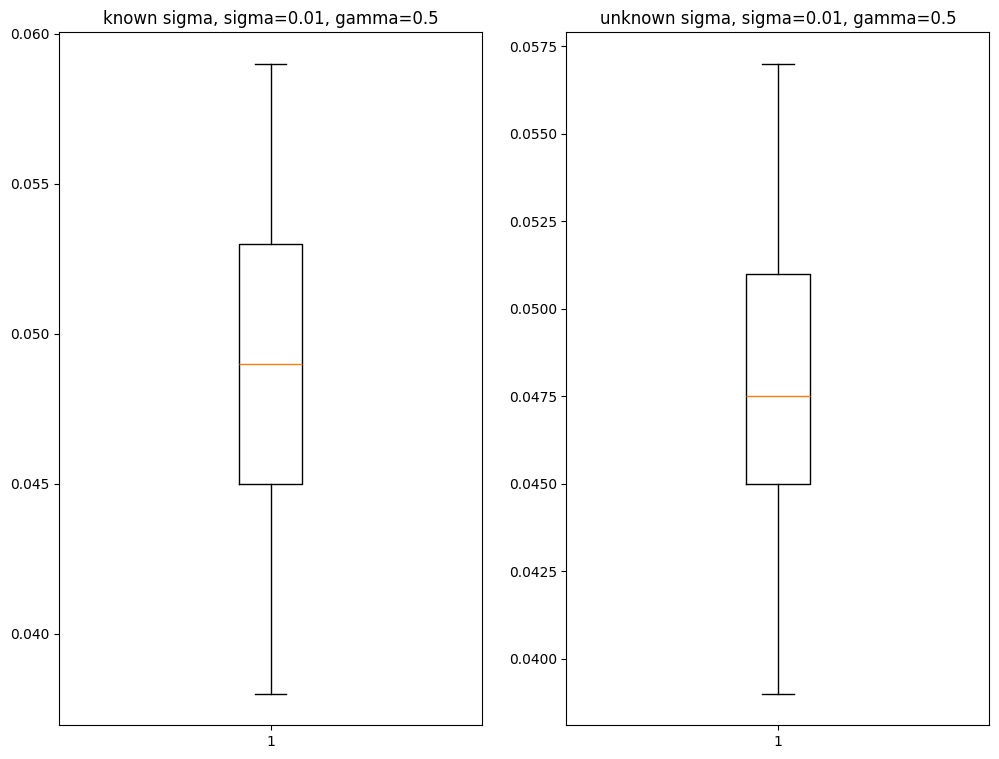

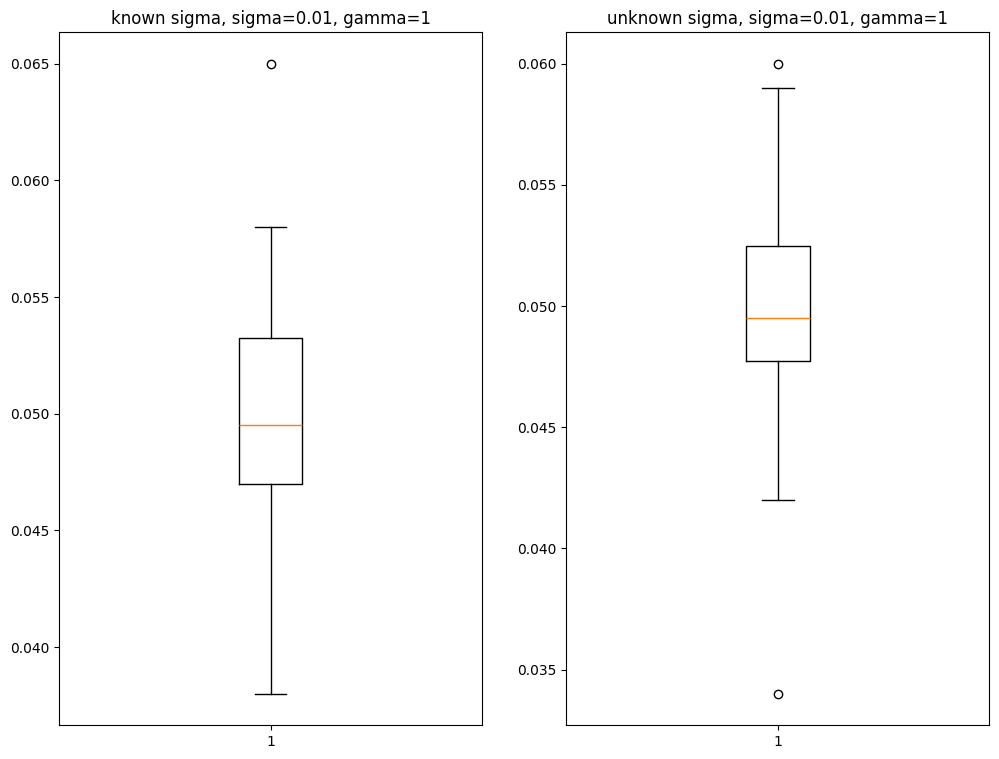

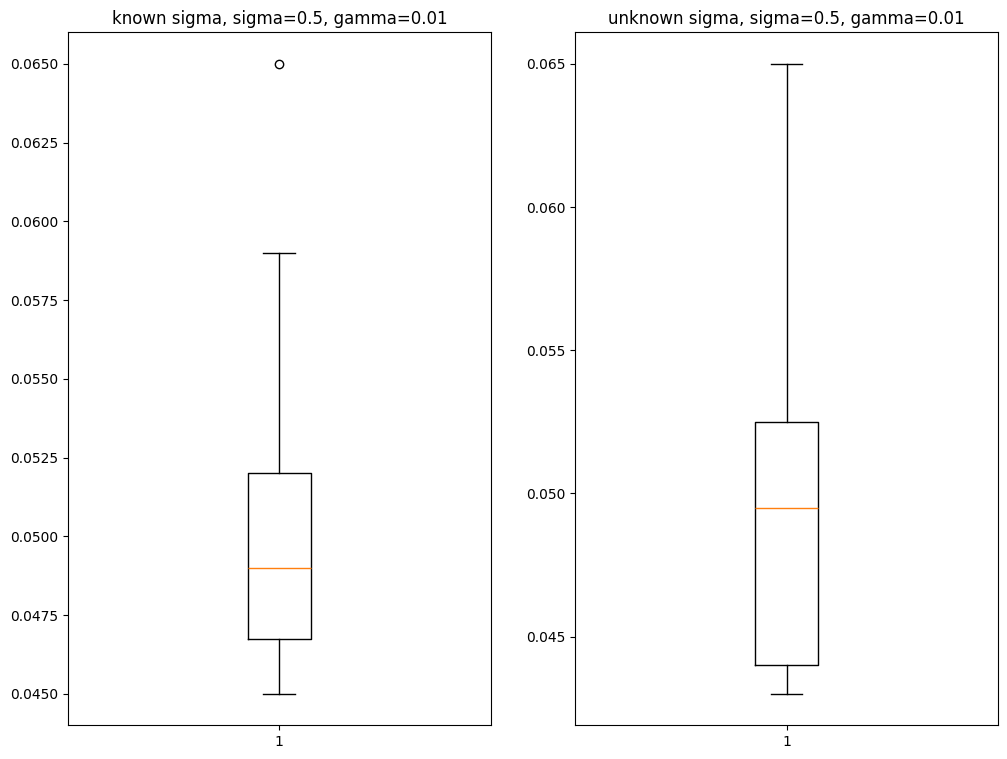

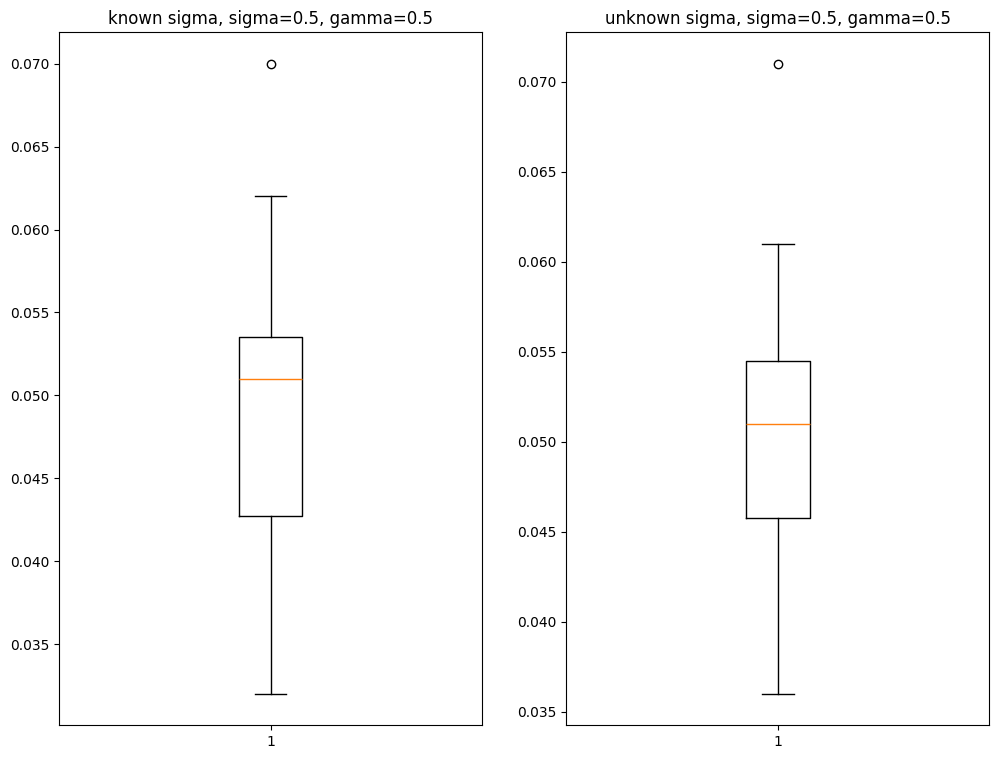

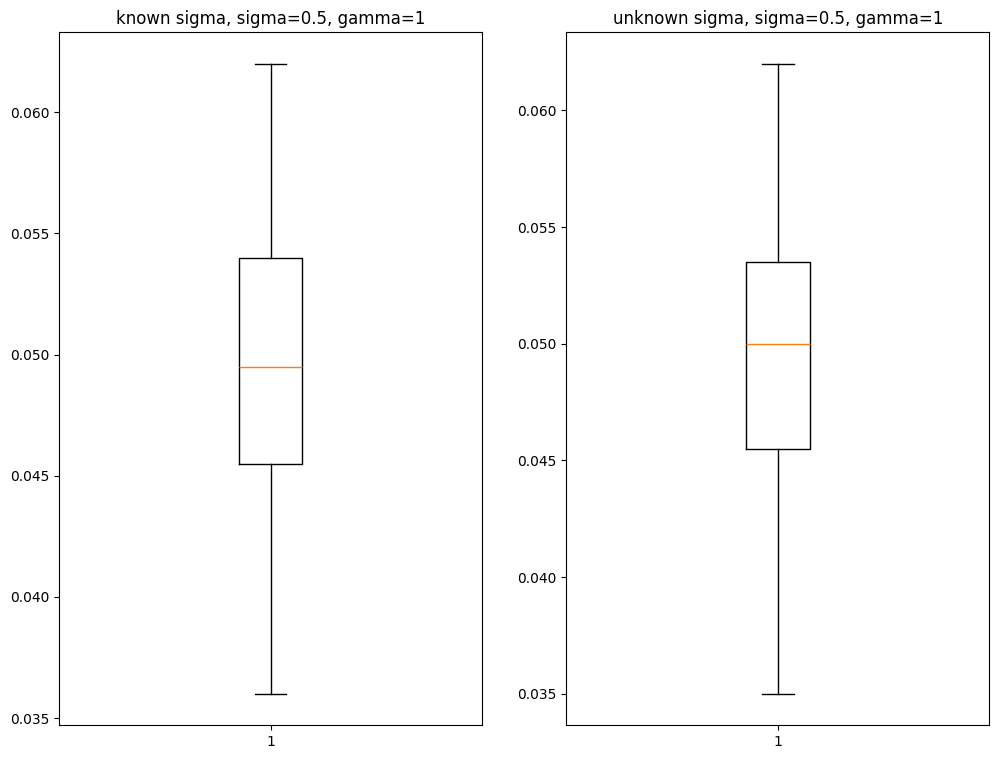

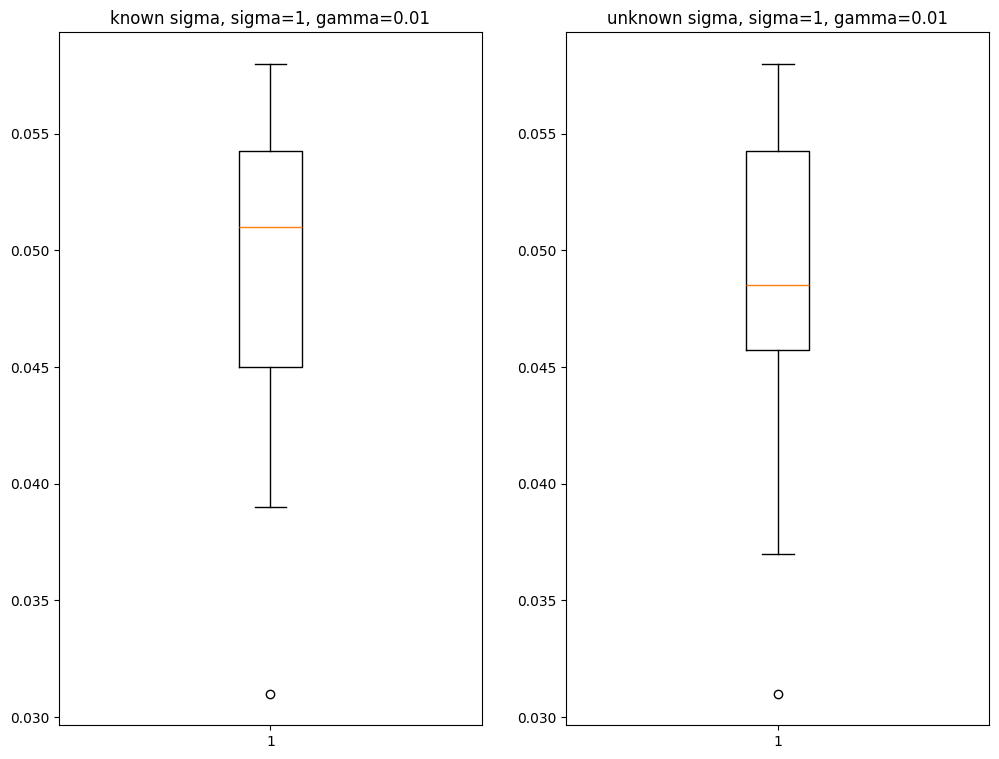

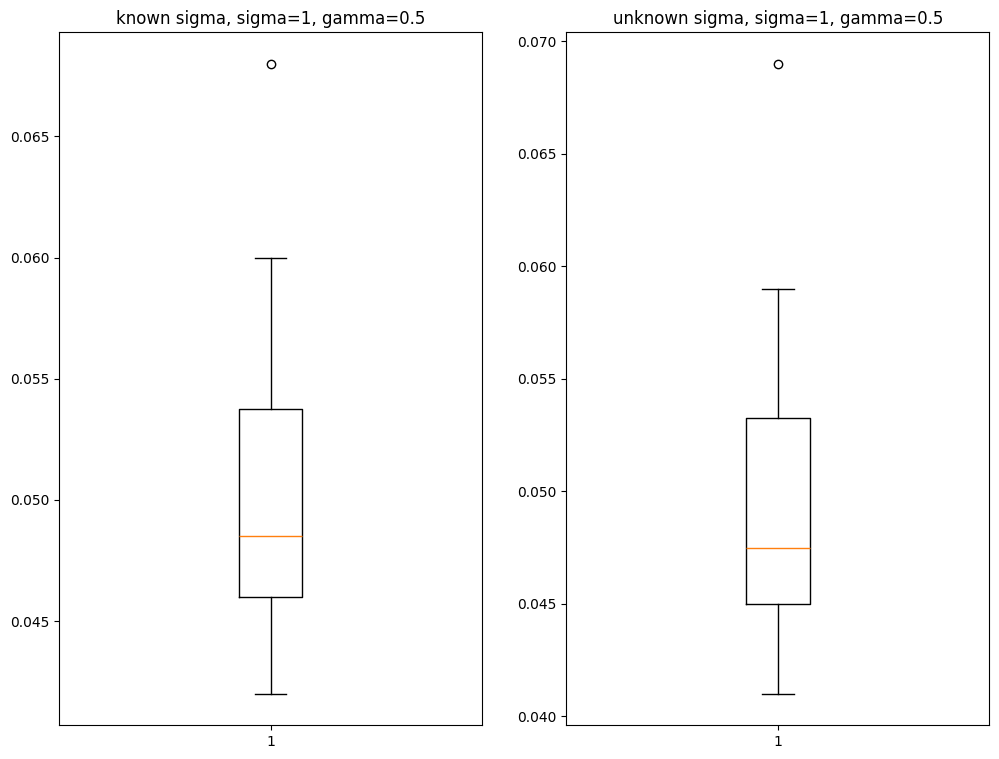

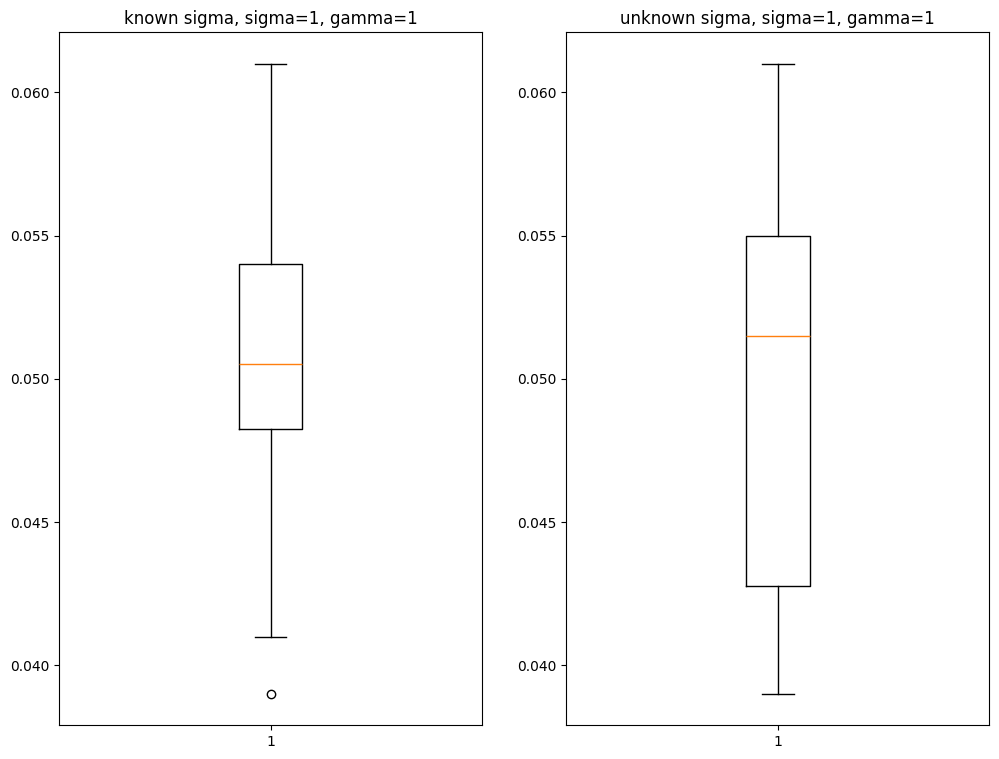

In [6]:
gamma_list = [0.01, 0.5, 1]
sigma_list = [0.01, 0.5, 1]
n_list = np.arange(100, 2001, 100)
N = 1000

b0 = 2
b1 = 4
alfa = 0.05

for sigma in sigma_list:
    for gamma in gamma_list:
        known_Y_hat_conv_list = []
        unknown_Y_hat_conv_list = []
        for n in n_list:
            known_Y_hat_count = 0
            unknown_Y_hat_count = 0
            for i in range(N):
                x = np.arange(1, n+1)
                e_i = np.random.normal(0, sigma, n)
                y_i = b0 + b1*x + e_i
                
                b0_hat, b1_hat = least_squares(x, y_i)
                
                x_0 = np.mean(x) + gamma
                Y0_hat = b0_hat + b1_hat*x_0
                
                y_i_hat = b0_hat + b1_hat * x
                s = np.sqrt(np.sum((y_i - y_i_hat)**2) / (n-2))
                
                z = norm.ppf(1 - alfa/2)
                t_student = t.ppf(1 - alfa/2, n-2)
                
                # znana sigma
                known_Y_hat_bottom = Y0_hat - z * sigma * np.sqrt(1/n + (x_0 - x.mean())**2 / np.sum((x - x.mean())**2))
                known_Y_hat_top = Y0_hat + z * sigma * np.sqrt(1/n + (x_0 - x.mean())**2 / np.sum((x - x.mean())**2))
                
                # nieznana sigma
                unknown_Y_hat_bottom = Y0_hat - t_student * s * np.sqrt(1/n + (x_0 - x.mean())**2 / np.sum((x - x.mean())**2))
                unknown_Y_hat_top = Y0_hat + t_student * s * np.sqrt(1/n + (x_0 - x.mean())**2 / np.sum((x - x.mean())**2))
                
                Y0 = b0 + b1*x_0
                
                if unknown_Y_hat_bottom <= Y0 <= unknown_Y_hat_top:
                    unknown_Y_hat_count += 1
                if known_Y_hat_bottom <= Y0 <= known_Y_hat_top:
                    known_Y_hat_count += 1
            
            known_w = 1 - known_Y_hat_count/N
            unknown_w = 1 - unknown_Y_hat_count/N
            known_Y_hat_conv_list.append(known_w)
            unknown_Y_hat_conv_list.append(unknown_w)
            
        
        plt.figure(figsize=(12, 9))
        
        plt.subplot(1, 2, 1)
        plt.boxplot(known_Y_hat_conv_list)
        plt.title(f'known sigma, sigma={sigma}, gamma={gamma}')
        
        plt.subplot(1, 2, 2)
        plt.boxplot(unknown_Y_hat_conv_list)
        plt.title(f'unknown sigma, sigma={sigma}, gamma={gamma}')
        
        plt.show()
        

# Zad4

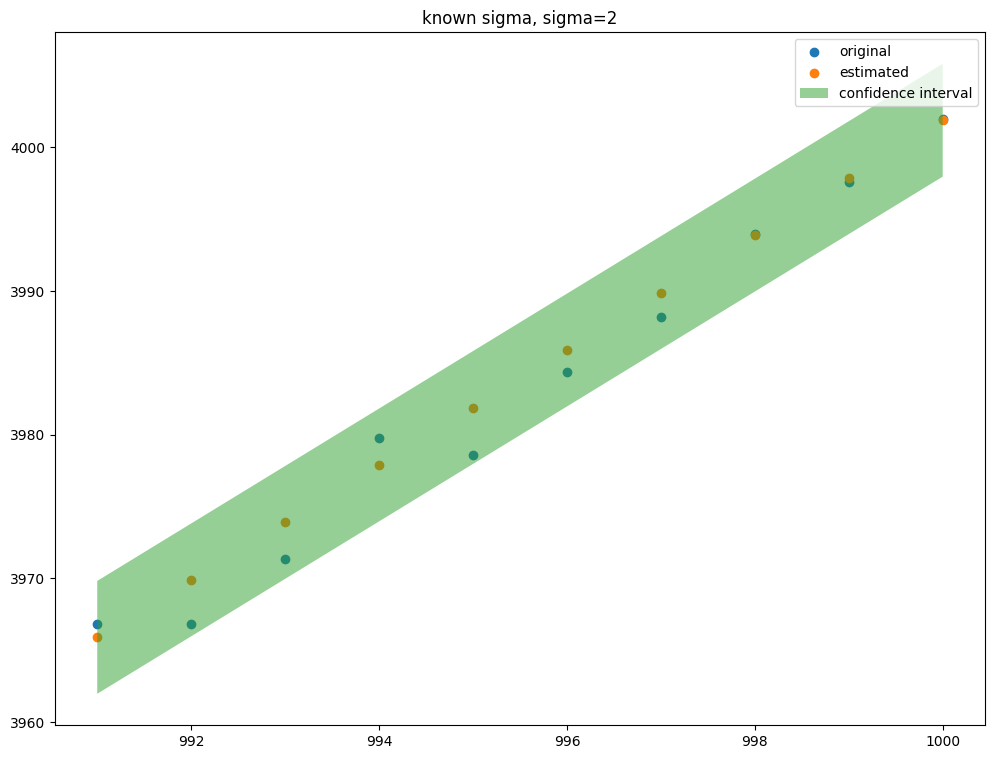

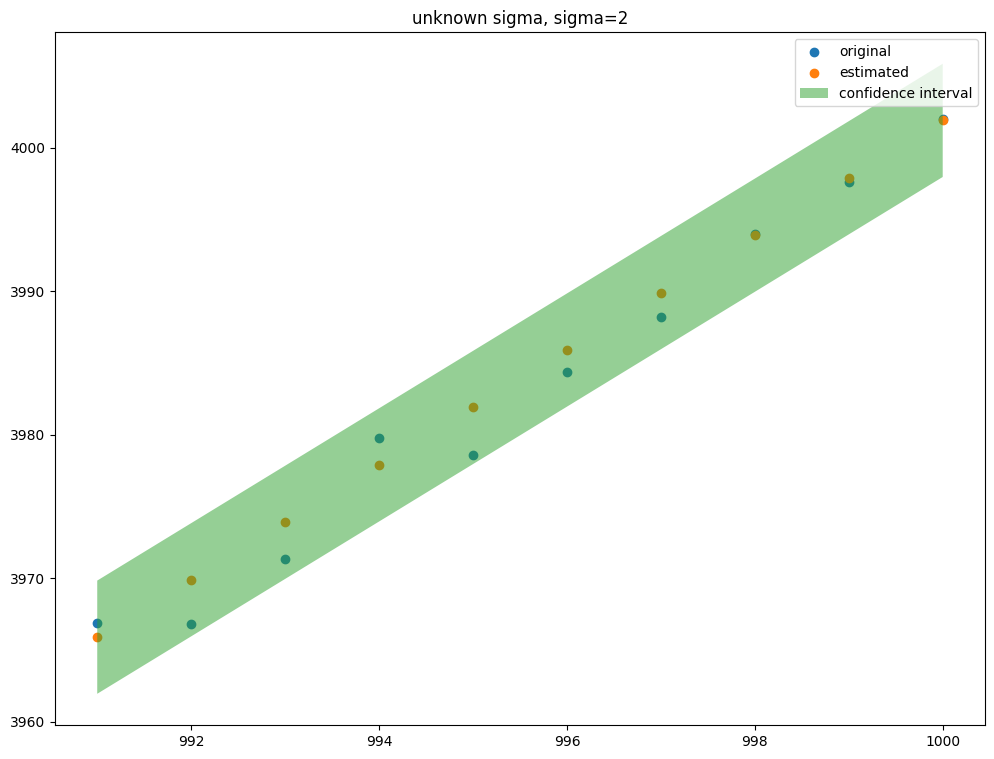

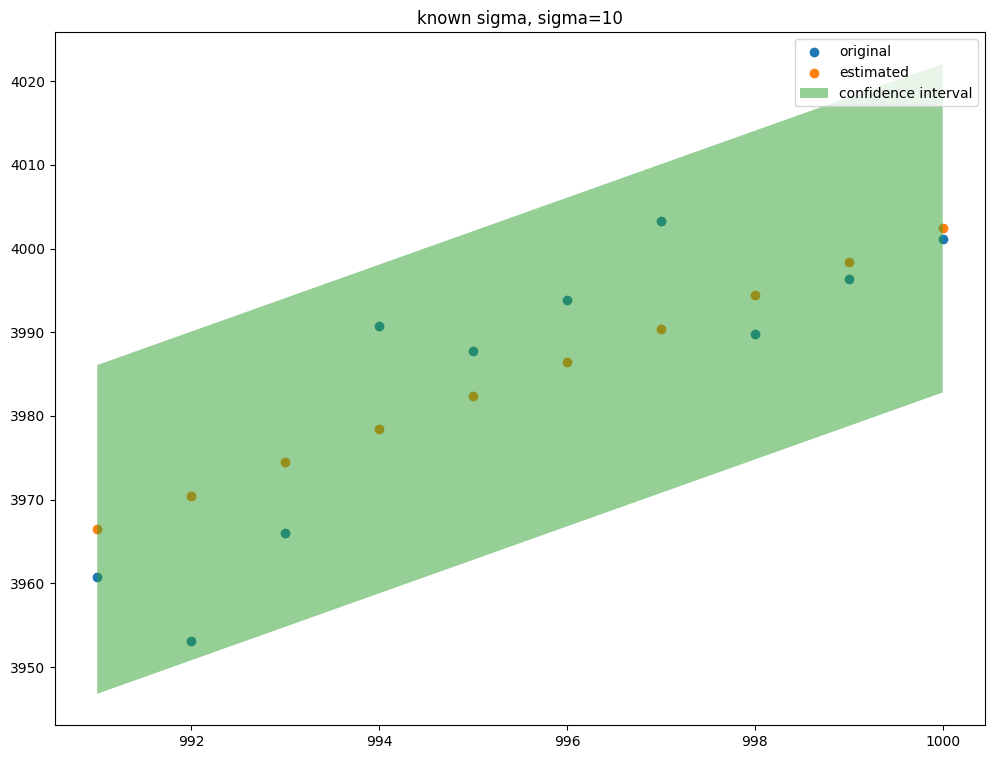

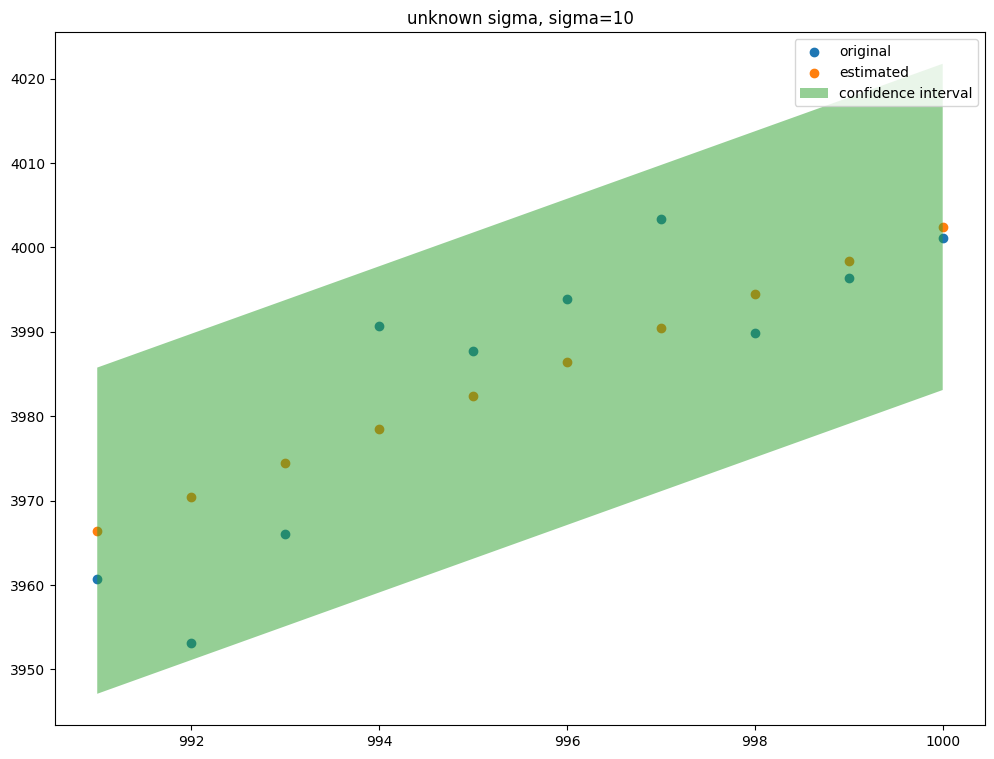

In [7]:
sigma_list = [2, 10]
n = 1000
b0 = 2
b1 = 4
alpha = 0.05

for sigma in sigma_list:
    x = np.arange(1, n+1)
    e_i = np.random.normal(0, sigma, n)
    y_i = b0 + b1*x + e_i
    
    b0_hat, b1_hat = least_squares(x[:990], y_i[:990])
    y_i_hat = b0_hat + b1_hat * x[990:]
    y_i_hat_990 = b0_hat + b1_hat * x[:990]
    
    s = np.sqrt(np.sum((y_i[:990] - y_i_hat_990)**2) / (n-2))
    t_student = t.ppf(1 - alpha/2, n-2)
    z = norm.ppf(1 - alpha/2)
    
    x0 = x[990:]
    # znana sigma
    known_y_i_hat_bottom = y_i_hat - z * sigma * np.sqrt(1 + 1/n + (x0 - x[:990].mean())**2 / np.sum((x[:990] - x[:990].mean())**2))
    known_y_i_hat_top = y_i_hat + z * sigma * np.sqrt(1 + 1/n + (x0 - x[:990].mean())**2 / np.sum((x[:990] - x[:990].mean())**2))
    
    # nieznana sigma
    unknown_y_i_hat_bottom = y_i_hat - t_student * s * np.sqrt(1 + 1/n + (x0 - x[:990].mean())**2 / np.sum((x[:990] - x[:990].mean())**2))
    unknown_y_i_hat_top = y_i_hat + t_student * s * np.sqrt(1 + 1/n + (x0 - x[:990].mean())**2 / np.sum((x[:990] - x[:990].mean())**2))
    
    plt.figure(figsize=(12, 9))
    plt.scatter(x[990:], y_i[990:], label='original')
    plt.scatter(x[990:], y_i_hat, label='estimated')
    plt.fill_between(x[990:], known_y_i_hat_bottom, known_y_i_hat_top, alpha=0.5, label='confidence interval')
    plt.title(f'known sigma, sigma={sigma}')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12, 9))
    plt.scatter(x[990:], y_i[990:], label='original')
    plt.scatter(x[990:], y_i_hat, label='estimated')
    plt.fill_between(x[990:], unknown_y_i_hat_bottom, unknown_y_i_hat_top, alpha=0.5, label='confidence interval')
    plt.title(f'unknown sigma, sigma={sigma}')
    plt.legend()
    plt.show()
        